In [3]:
# install openCV package
!pip3 install opencv-python-headless

# To get the average frame count
import glob
import numpy as np
import cv2
import os

# Update the path to your desired directory
video_directory = 'F:/Master/Research Project/Datasets/DFDC/Experiment Dataset/dfdc_train_part_1_exp'

# To get the average frame count 
video_files =  glob.glob(video_directory + '/*.mp4')
video_files = [os.path.normpath(file) for file in video_files]

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

print("frames", frame_count)
print("Total number of videos:", len(frame_count))
print('Average frame per video:', np.mean(frame_count))

frames [299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 299, 300, 299, 299, 299, 299, 300, 300, 299, 299, 299, 299, 299, 299, 300, 299, 300, 299, 300, 299, 299, 299, 299, 300, 299, 299, 299, 299, 300, 300, 299, 299, 299, 299, 300, 299, 299, 299, 299, 299, 300, 299, 299, 299, 300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 299, 300, 299, 299, 300, 299, 300, 300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 300, 300, 299, 300, 299, 299, 299, 299, 300, 299, 299, 299, 299, 300, 299, 299, 299, 299, 299, 299, 300, 299, 299, 299, 300, 299, 299, 300, 299, 300, 299, 299, 299, 299, 299, 299, 300, 299, 299, 299, 299, 300, 299, 299, 299, 299, 300, 299, 300, 299, 300, 299, 299, 299, 299, 299, 300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 299, 299, 299, 299, 299, 300, 300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 299, 299, 299, 300, 299, 299, 299, 299, 299, 299, 300, 299, 299, 300, 299, 299, 299, 29

In [ ]:
!pip3 install mtcnn
!pip3 install tensorflow

In [4]:
!pip3 install facenet-pytorch
!pip3 install tqdm

In [5]:
# to extract frame into images
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = 1
    while success:
        success, image = vidObj.read()
        if success:
            yield image

In [5]:
!nvidia-smi

Mon Oct 16 14:17:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P8    11W / 170W |    695MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from tqdm.autonotebook import tqdm
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from PIL import Image, ImageDraw
from IPython import display


# Determine if an nvidia GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Running on device: {}".format(device))

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

# create a face detection pipeline using MTCNN
# mtcnn = MTCNN(keep_all=True, image_size=224, margin=0, device=device)
mtcnn = MTCNN(keep_all=True, image_size=224, margin=0)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained="vggface2").eval()

C:\Users\User\AppData\Local\Temp\ipykernel_19176\901043875.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Running on device: cuda:0
True
1
NVIDIA GeForce RTX 3060


In [7]:
frames_tracked = []


# to create face images
def create_face_images(path_list, out_dir):
    already_present_count = glob.glob(out_dir + "*.jpg")
    print("No of images already present ", len(already_present_count))
    # print(path_list)
    # print(out_dir)

    for path in tqdm(path_list):
        out_path = os.path.join(out_dir, os.path.splitext(os.path.basename(path))[0])
        file_exists = glob.glob(out_path + "*.jpg")
        # print(file_exists)
        if len(file_exists) != 0:
            print("Files Already exist: ", out_path)
            continue
        frames = [
            Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            for frame in frame_extract(path)
        ]

        for idx, frame in enumerate(frames):
            print(frame)
            if idx <= 150:
                # Detect faces using MTCNN
                boxes, probs = mtcnn.detect(frame)
                print(boxes)
                print(probs)

                # Draw faces
                frame_draw = frame.copy()
                draw = ImageDraw.Draw(frame_draw)

                # Add to frame list
                frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))

                for i, face in enumerate(boxes):
                    bbox = face
                    # print(bbox)
                    top, right, bottom, left = bbox
                    print(top, right, bottom, left)

                    draw.rectangle(bbox.tolist(), outline=(255, 0, 0), width=6)
                    cropped_image = frame.crop(tuple(bbox))

                    # Extract the face
                    # face_image = frame[top:bottom, left:right, :]
                    # face_image = frame[right : right + left, top : top + bottom]
                    # print(i)
                    # print(frame)
                    # print(frame[right : right+left, top : top+bottom])

                    # Save the face as an image
                    face_filename = f"{out_path}_{idx}_face_{i}.jpg"
                    # cv2.imwrite(face_filename, face_image)
                    cropped_image.save(face_filename)

In [9]:
create_face_images(
    video_files, "F:/Master/Research Project/Generated Data/DFDC_Face_only_data"
)

No of images already present  0


  0%|          | 0/1699 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895A3E0>
[[518.234619140625 261.7532043457031 790.2434692382812 621.11572265625]
 [832.7639770507812 149.44363403320312 963.9954833984375
  304.53179931640625]]
[0.7906476855278015 0.979488730430603]
518.234619140625 261.7532043457031 790.2434692382812 621.11572265625
832.7639770507812 149.44363403320312 963.9954833984375 304.53179931640625
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895A2C0>
[[836.3551635742188 149.27163696289062 966.0438842773438
  300.9661865234375]]
[0.9832161068916321]
836.3551635742188 149.27163696289062 966.0438842773438 300.9661865234375
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895A3B0>
[[835.569091796875 150.0800018310547 965.09130859375 303.7608337402344]]
[0.9923816323280334]
835.569091796875 150.0800018310547 965.09130859375 303.7608337402344
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895A470>
[[831.8232421875 145.75489807128906 965.2982177734375 309.461181640625

  0%|          | 1/1699 [00:28<13:13:36, 28.04s/it]

[[842.9822998046875 140.88592529296875 963.258544921875 292.0412902832031]]
[0.9989700317382812]
842.9822998046875 140.88592529296875 963.258544921875 292.0412902832031
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895BFA0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895BFD0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C040>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C070>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C0A0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C0D0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C100>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C130>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C160>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C190>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C1C0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1688895C1F0>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0

  0%|          | 1/1699 [00:32<15:09:57, 32.15s/it]

[[718.4482421875 132.46975708007812 1008.5650024414062 492.6806335449219]]
[0.9992138147354126]
718.4482421875 132.46975708007812 1008.5650024414062 492.6806335449219
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x168889BAEC0>


KeyboardInterrupt: 

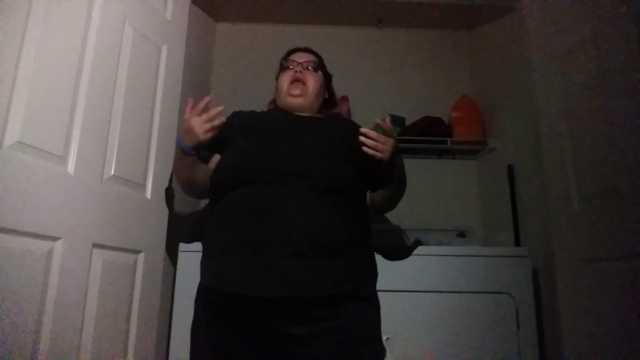

In [98]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass